In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
#preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# evaluation metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
df = pd.read_csv('StudentsPerformance.csv')

In [17]:
X = df.drop(columns='math score',axis=1)
y = df['math score']

In [18]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)
X = preprocessor.fit_transform(X)
X = pd.DataFrame(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(800, 19)
(200, 19)


In [20]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)
    return mae, mse, rmse, r2

In [21]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Support Vector Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'XGB Regressor': XGBRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    # predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluation
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    results.append({
        "Model": name,
        "Train_RMSE": train_rmse,
        "Train_MAE": train_mae,
        "Train_R2": train_r2,
        "Test_RMSE": test_rmse,
        "Test_MAE": test_mae,
        "Test_R2": test_r2
    })

In [22]:
results_df = pd.DataFrame(results,columns=['Model','Train_R2','Test_R2'])

results_df["R2_gap"] = results_df["Train_R2"] - results_df["Test_R2"]

results_df = pd.DataFrame(results_df.sort_values(by="Test_R2", ascending=False))

results_df

,Model,Train_R2,Test_R2,R2_gap
1,Ridge,0.874304,0.880593,-0.006289
0,Linear Regression,0.874317,0.880433,-0.006116
6,Random Forest Regressor,0.977016,0.853992,0.123024
8,CatBoost Regressor,0.958936,0.851632,0.107304
7,AdaBoost Regressor,0.850000,0.849738,0.000262
9,XGB Regressor,0.995500,0.827797,0.167703
2,Lasso,0.807146,0.825320,-0.018174
3,KNeighbors Regressor,0.855488,0.783813,0.071675
5,Decision Tree Regressor,0.999653,0.763272,0.236381
4,Support Vector Regressor,0.808128,0.728600,0.079528


# Linear regression

In [23]:
lin_R = LinearRegression()
lin_model = lin_R.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)

score = r2_score(y_test,y_pred)*100
print(f'Accuracy of the model is {round(score,2)}%')

Accuracy of the model is 88.04%


In [24]:
pred_df = pd.DataFrame({'Actual value':y_test,'Predicted value': y_pred, 'Error': y_pred - y_test})


Text(0.5, 1.0, 'Actual vs Predicted values')

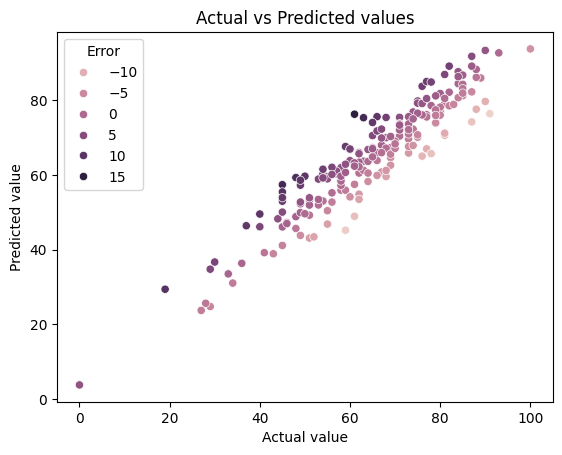

In [25]:
sns.scatterplot(data=pred_df,x='Actual value',y='Predicted value',hue='Error')
plt.title('Actual vs Predicted values')

<Axes: xlabel='math score'>

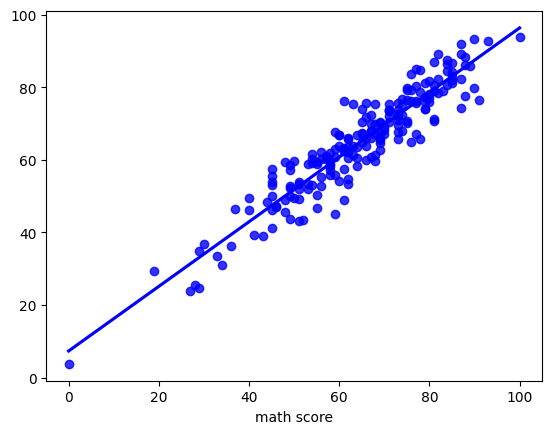

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='b')